# **Construindo um modelo de Regress√£o para marketing**
**Autor:** **Gilson Machado**

## Entendendo o problema

Uma empresa est√° investindo mensalmente em plataformas de publicidade, como Youtube, Facebook e newspaper, para a prospec√ß√£o de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

####Objetivo do projeto:
Criar uma an√°lise explorat√≥ria que mostre a correla√ß√£o entre os investimentos e as vendas, al√©m de um modelo que ir√° prever o total de vendas gerado a partir de um investimento em uma plataforma de m√≠dia usando como base os dados sobre investimentos anteriores.

### Planejamento do projeto

O projeto foi estruturado nas seguintes fases:

1.  **An√°lise descritiva**
2.  **Tratamento dos dados**
3.  **An√°lise explorat√≥ria**
4.  **Cria√ß√£o do modelo**
5.  **Teste do modelo**
6.  **Avalia√ß√£o geral**

### Avalia√ß√£o inicial das ferramentas e t√©cnicas.

O projeto ser√° realizado com as seguintes bibliotecas:

*   Pandas
*   Seaborn
*   SKLearn
*   Google Colab
*   Matplotlib

### Importa√ß√£o das bibliotecas e arquivo

In [ ]:
# Bibliotecas.
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# O dataset.
dataset = files.upload()

Saving MKT.csv to MKT (2).csv


In [ ]:
# Criando um dataframe do Pandas com o arquivo carregado.
dados = pd.read_csv('/content/MKT.csv')

### Entendimento inicial dos dados

In [ ]:
# Verificando os primeiros registros.
dados.head()

youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88

In [ ]:
# Verificando os √∫ltimos registros.
dados.tail()

youtube  facebook  newspaper  sales
166    45.84      4.44      16.56   9.12
167   113.04      5.88       9.72  11.64
168   212.40     11.16       7.68  15.36
169   340.32     50.40      79.44  30.60
170   278.52     10.32      10.44  16.08

In [ ]:
# Entendendo a distribui√ß√£o dos dados.
dados.info()
dados.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
# Vari√°veis estat√≠sticas.
round(dados.describe(), 2)

youtube  facebook  newspaper   sales
count   171.00    171.00     171.00  171.00
mean    178.02     27.67      35.24   16.92
std     102.45     17.91      24.90    6.31
min       0.84      0.00       0.36    1.92
25%      91.08     11.70      13.74   12.54
50%     179.76     26.76      31.08   15.48
75%     262.98     43.68      50.88   20.82
max     355.68     59.52     121.08   32.40

In [ ]:
# Valor total de cada investimento por rede social mais o valor das vendas totais.
dados_total = pd.DataFrame({'Tipo': dados.columns, 'Total': dados.sum()})
dados_total.reset_index(inplace=True)
dados_total = dados_total[['Tipo', 'Total']]
dados_total

Tipo     Total
0    youtube  30441.60
1   facebook   4731.84
2  newspaper   6026.04
3      sales   2893.80

### Visualiza√ß√£o gr√°fica dos dados

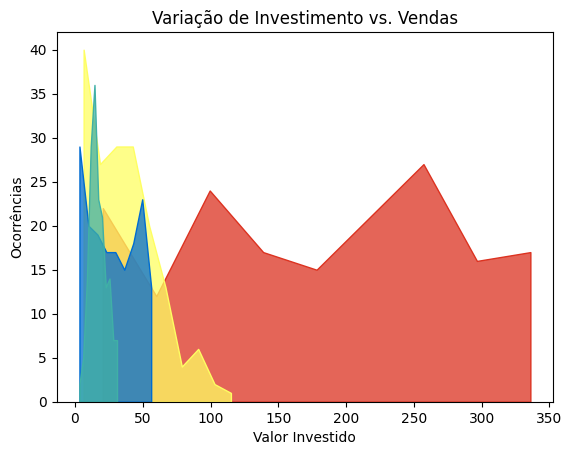

In [ ]:
# Histograma dos dados.
sns.histplot(data=dados, x="youtube", color="#DC3220", element="poly")
sns.histplot(data=dados, x="newspaper", color="#FEFE62", element="poly")
sns.histplot(data=dados, x="facebook", color="#006CD1", element="poly")
sns.histplot(data=dados, x="sales", color="#40B0A6", element="poly")
plt.ylabel("Ocorr√™ncias")
plt.xlabel("Valor Investido")
plt.title("Varia√ß√£o de Investimento vs. Vendas");

üü• youtube | üü® newspaper | üü¶ facebook | üü© sales
### O esquema de cores do gr√°fico acima √© inclusivo, pois cont√©m tonalidades de cores para que pessoas com daltonismo possam ter a mesma experi√™ncia visual.

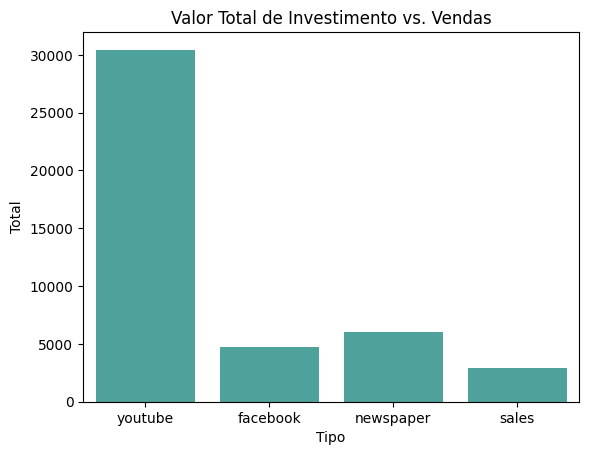

In [ ]:
# Montando o gr√°fico do total de cada coluna.
sns.barplot(data=dados_total, x='Tipo', y='Total', color="#40B0A6" );
plt.title("Valor Total de Investimento vs. Vendas");

### Qualidade dos dados


1.  A m√©dia dos valores da coluna youtube √© **bem maior** que a soma das m√©dias das outras colunas, ou seja, *M√©dia Youtube > (M√©dia Facebook + M√©dia Newspaper + M√©dia Sales)*.
2.  O desvio padr√£o da coluna youtube est√° acima de 100, o que representa uma **varia√ß√£o de valores muito grande** para investimentos em marketing, sendo este desvio muito mais condizente com a varia√ß√£o de receita de vendas (sales).
3.  A m√©dia de sales √© a **mais baixa** e considerando os anos 20 do s√©culo XXI, onde o digital est√° muito acima das m√≠dias offline, essa m√©dia parece mais consistente com os gastos em jornais (*\"newspaper"*).

### Tratamento dos dados

In [ ]:
# Renomeando as colunas do dataframe principal.
dados = dados.rename(columns={'youtube': 'sales', 'facebook': 'youtube', 'newspaper': 'facebook', 'sales': 'newspaper'})
dados.head()

sales  youtube  facebook  newspaper
0   84.72    19.20     48.96      12.60
1  351.48    33.96     51.84      25.68
2  135.48    20.88     46.32      14.28
3  116.64     1.80     36.00      11.52
4  318.72    24.00      0.36      20.88

### Constru√ß√£o dos dados

Para facilitar o entendimento do comportamento das vari√°veis posteriormente, ser√£o adicionadas duas colunas:

1.  Investimento, com a soma dos valores de youtube, facebook e newspaper;
2.  ROI (*Return Over Investment*), que ser√° um c√°lculo feito em cima das vari√°veis anteriores na seguinte f√≥rmula:

</br>
$$
ROI =\frac{sales-(youtube+facebook+newspaper)}{(youtube+facebook+newspaper)}
$$
</br>

In [ ]:
# Construindo a nova coluna 'investimento' no dataframe principal.
dados_alt = dados
dados_alt['investimento'] = dados_alt['youtube'] + dados_alt['facebook'] + dados_alt['newspaper']
dados_alt.head()

sales  youtube  facebook  newspaper  investimento
0   84.72    19.20     48.96      12.60         80.76
1  351.48    33.96     51.84      25.68        111.48
2  135.48    20.88     46.32      14.28         81.48
3  116.64     1.80     36.00      11.52         49.32
4  318.72    24.00      0.36      20.88         45.24

In [ ]:
# Construindo a nova coluna 'ROI' no dataframe principal.
dados_alt['ROI'] = round((dados_alt['sales'] - dados_alt['investimento']) / dados_alt['investimento'], 2)
dados_alt.head()

sales  youtube  facebook  newspaper  investimento   ROI
0   84.72    19.20     48.96      12.60         80.76  0.05
1  351.48    33.96     51.84      25.68        111.48  2.15
2  135.48    20.88     46.32      14.28         81.48  0.66
3  116.64     1.80     36.00      11.52         49.32  1.36
4  318.72    24.00      0.36      20.88         45.24  6.05

In [ ]:
# Atualizando o dataframe de totais sem o ROI.
dados_total = pd.DataFrame({'Tipo': dados_alt.columns, 'Total': dados_alt.sum()})
dados_total.drop(['ROI'], axis=0, inplace=True)
dados_total.reset_index(inplace=True)
dados_total = dados_total[['Tipo', 'Total']]
dados_total

Tipo     Total
0         sales  30441.60
1       youtube   4731.84
2      facebook   6026.04
3     newspaper   2893.80
4  investimento  13651.68

## An√°lise explorat√≥ria dos dados

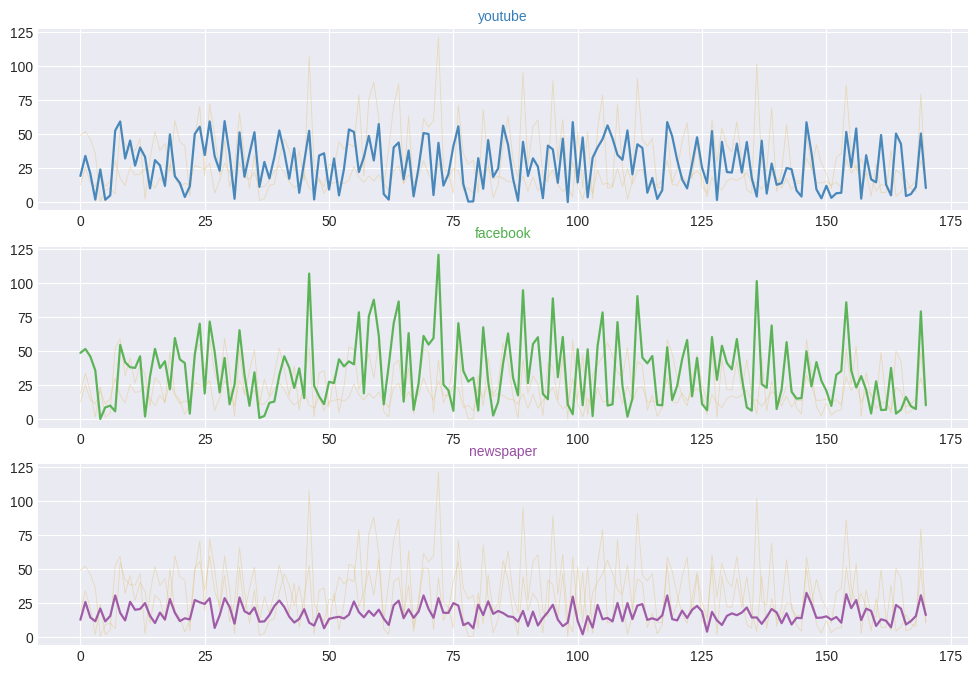

In [ ]:
# Tipos de investimento por gr√°fico de linha.
multi = dados_alt[['youtube', 'facebook', 'newspaper']]
plt.figure(figsize=(12,8))
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set1')
num = 0
for col in multi:
  num += 1
  plt.subplot(3, 1, num)
  for v in multi:
    plt.plot(multi.index, multi[v], marker='', color='#E1BE6A', linewidth=0.6, alpha=0.4)
  plt.plot(multi.index, multi[col], marker='', color=palette(num), linewidth=1.6, alpha=0.9, label=col)
  plt.title(col, loc='center', fontsize=10, fontweight=0, color=palette(num))
plt.show();

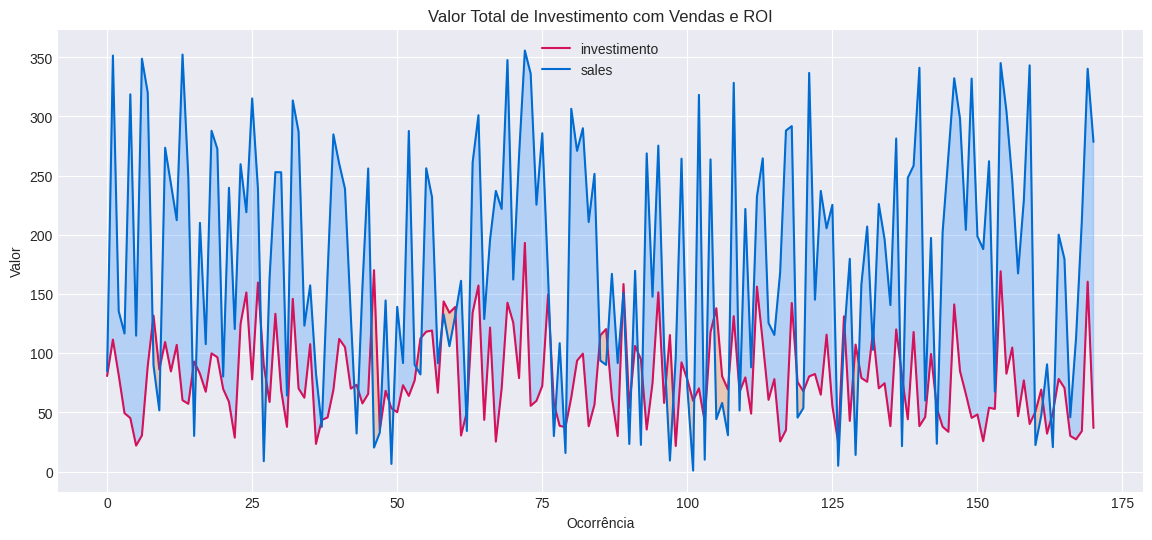

In [ ]:
# Configurando um gr√°fico preenchido de linhas com total de investimento sobre vendas.
fig, ay = plt.subplots(figsize=(14, 6))
sns.lineplot(data=dados_alt, x=dados_alt.index, y='investimento', color='#D41159', label='investimento')
sns.lineplot(data=dados_alt, x=dados_alt.index, y='sales', color='#006CD1', label='sales')
ay.fill_between(
    dados_alt.index, dados_alt['investimento'], dados_alt['sales'],
    where=(dados_alt['investimento'] > dados_alt['sales']),
    interpolate=True, color='#E66100', alpha=0.25
    )
ay.fill_between(
    dados_alt.index, dados_alt['investimento'], dados_alt['sales'],
    where=(dados_alt['investimento'] < dados_alt['sales']),
    interpolate=True, color='#1A85FF', alpha=0.25
    )
ay.legend()
plt.xlabel('Ocorr√™ncia')
plt.ylabel('Valor')
plt.title("Valor Total de Investimento com Vendas e ROI");

In [ ]:
# Verifica√ß√£o de rela√ß√£o entre as colunas em tabela.
dados_alt.corr()

sales   youtube  facebook  newspaper  investimento       ROI
sales         1.000000  0.086538  0.110759   0.782030      0.242053  0.630784
youtube       0.086538  1.000000  0.293425   0.602918      0.759873 -0.456183
facebook      0.110759  0.293425  1.000000   0.254987      0.831638 -0.422037
newspaper     0.782030  0.602918  0.254987   1.000000      0.614250  0.160420
investimento  0.242053  0.759873  0.831638   0.614250      1.000000 -0.462523
ROI           0.630784 -0.456183 -0.422037   0.160420     -0.462523  1.000000

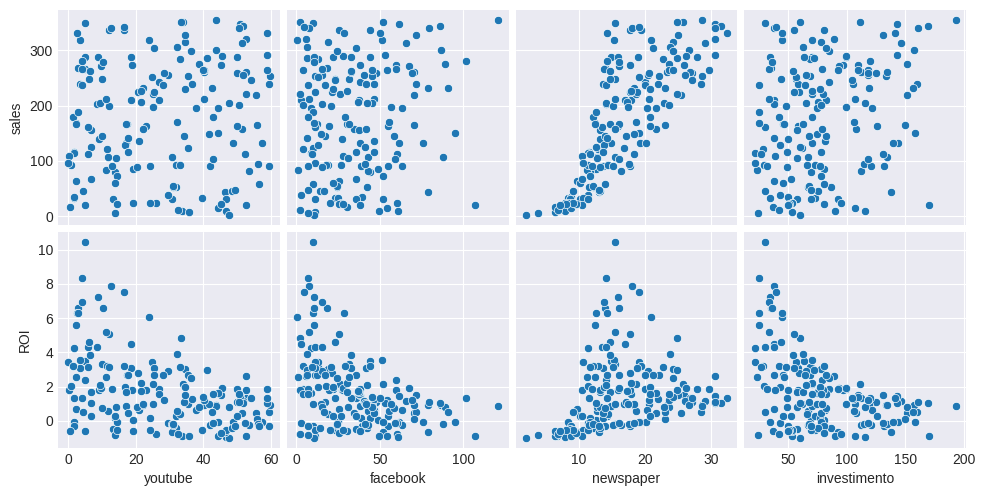

In [ ]:
# Verificando a rela√ß√£o entre as colunas em gr√°fico.
sns.pairplot(dados_alt, x_vars=['youtube', 'facebook', 'newspaper', 'investimento'], y_vars=['sales', 'ROI'], );

A influ√™ncia do investimento em plataformas como YouTube e Facebook nas vendas √© virtualmente insignificante. Al√©m disso, em compara√ß√£o com o retorno sobre o investimento (ROI), ambos os canais demonstram uma correla√ß√£o negativa, indicando que quanto maior o investimento, menor o retorno.

A correla√ß√£o mais significativa √© observada no investimento em m√≠dia impressa, onde h√° um aumento proporcional nas vendas e no ROI.

Portanto, a aloca√ß√£o de recursos publicit√°rios √© mais crucial do que a quantidade investida em si.

## Modelagem dos Dados

### Sele√ß√£o do modelo
- O modelo selecionado para este projeto √© o de Regress√£o Linear Simples, da biblioteca scikit-learn.

### Treinamento do modelo

O modelo ser√° treinado separando o dataset tratado (*dados_alt*) em 4 vari√°veis:
*   Uma X de treino e uma X de teste;
*   Uma Y de treino e uma Y de teste.

In [ ]:
# Separa√ß√£o das vari√°veis X e Y.
X = dados_alt[['youtube', 'facebook', 'newspaper']]
Y = dados_alt['sales']

In [ ]:
# Separando as vari√°veis de treino e teste.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=22)

In [ ]:
# Chamando a regress√£o e treinando o modelo.
regL = LinearRegression()
regL.fit(X_train, Y_train)

LinearRegression()

### Teste do modelo

In [ ]:
# Testando o modelo.
model_teste = regL.predict(X_test)

In [ ]:
# Verificando a acur√°cia.
acuracia = r2_score(Y_test, model_teste)
print(f'A acur√°cia deste modelo √© de {round(acuracia*100)}%.')

A acur√°cia deste modelo √© de 91%.


### Resultado da acur√°cia

Ap√≥s iterar e ajustar o modelo, a acur√°cia m√°xima alcan√ßada foi de 91%, com 80% dos dados utilizados para o treinamento.

## Avalia√ß√£o e Resultados do projeto

O projeto demonstrou resultados altamente satisfat√≥rios em rela√ß√£o aos crit√©rios de sucesso estabelecidos.

Em rela√ß√£o aos crit√©rios de neg√≥cio, foi cumprido:

- Identifica√ß√£o das vari√°veis que apresentam correla√ß√£o significativa com as vendas.

Quanto aos crit√©rios do projeto, foram alcan√ßados os seguintes marcos:

- Desenvolvimento de uma an√°lise explorat√≥ria que ilustra a correla√ß√£o (ou sua aus√™ncia) entre os investimentos e o retorno.

- Implementa√ß√£o de um modelo de regress√£o linear com uma precis√£o m√≠nima de 90%.

### Revis√£o do processo

Todo o projeto passou pelas seguintes etapas:
1.  Entendimento dos dados que compunham o dataset
2.  Tratamento dos dados com altera√ß√£o nos t√≠tulos da coluna
3.  Constru√ß√£o de duas novas colunas (investimento, ROI)
4.  An√°lise explorat√≥ria dos dados e suas correla√ß√µes
5.  Treinamento e teste do modelo

### Poss√≠veis a√ß√µes futuras

Reestrutura√ß√£o o dataset e treinar o modelo com novas m√©tricas.

### Conclus√£o

O projeto demonstrou resultados satisfat√≥rios para o projeto requerido no desafio.










